# HTTP brute force detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


In [2]:
df = pd.read_csv("../final_datasets/http_bruteforce.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,28598F178AE82C013D63BCB803ECF5076F0ADEAE3CF59A...,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,6816FA59C4FC4163C63824257C377845076EAE36F27020...,443,1.601465e+09,1.601465e+09,False,3,6,...,1173.077292,1.342036,0.00,0.00,0.0,0.000000,0.0,0.0,1.600000,0.000000
1,1,632A7854237232035C4AA219F02B6BFAD2FEDA784DA0A1...,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,7B49C765CFBB935351B2A92A239DC45D3E2C6392237CDB...,443,1.601465e+09,1.601465e+09,False,3,4,...,1323.004346,0.250011,0.00,0.00,0.0,0.000000,0.0,0.0,2.000000,0.000000
2,2,6231B05C8CCDF8C359D7FBF547D458F4C4675C2298AB84...,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,12AFEE6C4C1D38B06C4A1288C0B1DEDF0B8C4FC30C5C8E...,443,1.601465e+09,1.601465e+09,False,10,11,...,1090.328219,0.776339,0.00,0.00,0.0,0.000000,0.0,0.0,1.142857,0.250000
3,3,1E5857055DE1CE379453DA517FB660FBFDF0277608ED6A...,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,F2A6B0CFC97E27F834CC5C925018EB7ACACB33C01075CE...,443,1.601465e+09,1.601465e+09,False,4,2,...,1002.876114,0.576090,0.00,0.00,0.0,0.000000,0.0,0.0,2.000000,0.750000
4,4,5E0C7366AF8F76A60B5653B5649154FB77AD59EC2F9404...,39118CC8C45401711E837CFE8D9F982596F7BCEA55A320...,B798731A3011B144DD29B8C473768A4E1AD8A69AE5EA4B...,443,1.601465e+09,1.601465e+09,False,11,26,...,1294.830668,2.380351,0.00,0.00,0.0,0.000000,0.0,0.0,1.130435,0.208333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923375,923375,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,681FFB41E89A2E2969E8C21D2FFAB8162BE146D4387DA7...,443,1.601636e+09,1.601636e+09,True,68,139,...,1243.615049,1.697841,0.57,1.71,3.0,0.030303,0.0,1.0,0.989899,0.160000
923376,923376,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,DC5CB4DCDDAB40D31E08EB83A76E7DCDB5B32540F5F5A6...,443,1.601636e+09,1.601636e+09,True,16,23,...,1071.844438,1.076184,0.00,0.00,0.0,0.000000,0.0,0.0,1.263158,0.300000
923377,923377,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,192AA6A3A74999CE1FE77403D84361927CB061810B06F3...,443,1.601636e+09,1.601636e+09,True,16,22,...,1077.743917,1.121531,0.60,0.60,1.0,0.052632,0.0,1.0,1.263158,0.300000
923378,923378,6D1F3979A2F28D1020EEE08BA72CEBDAFF30B425094A1F...,2B4079E7083A44B9EB26A3D62B508BDEE0A1695B303E2C...,5C875E8A7D5E64C51FE4087F9A8FCCD0E11166E0148DD7...,443,1.601636e+09,1.601636e+09,True,16,22,...,1078.024466,1.123477,0.00,0.00,0.0,0.000000,0.0,0.0,1.263158,0.300000


In [10]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [11]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [12]:
print(f"http bruteforce: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

http bruteforce: 39530	clear: 883850


In [13]:
df = df[["LABEL_code"] + features].copy()

In [14]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [16]:
print(f"http bruteforce: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

http bruteforce: 39530	clear: 883850


In [19]:
df_validation = df.sample(n = 100000)
df_features =  df[~df.isin(df_validation)].dropna()

In [20]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [21]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 30, 2),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 80, 400, 20),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [22]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [43:22<00:00, 26.02s/trial, best loss: -0.9973426971623803]  
The best hyperparameters are :  

{'colsample_bytree': 0.48438495510251084, 'gamma': 2.597327736705628, 'max_depth': 26.0, 'min_child_weight': 16.0, 'n_estimators': 400.0, 'reg_alpha': 1.0, 'reg_lambda': 0.858031153832057}


In [23]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      # #Split on train and test
      X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      X_train = X_train_a[features]
      X_test = X_test_a[features] 
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
            gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.98 & 99.91 & 99.53 & 99.72 \\


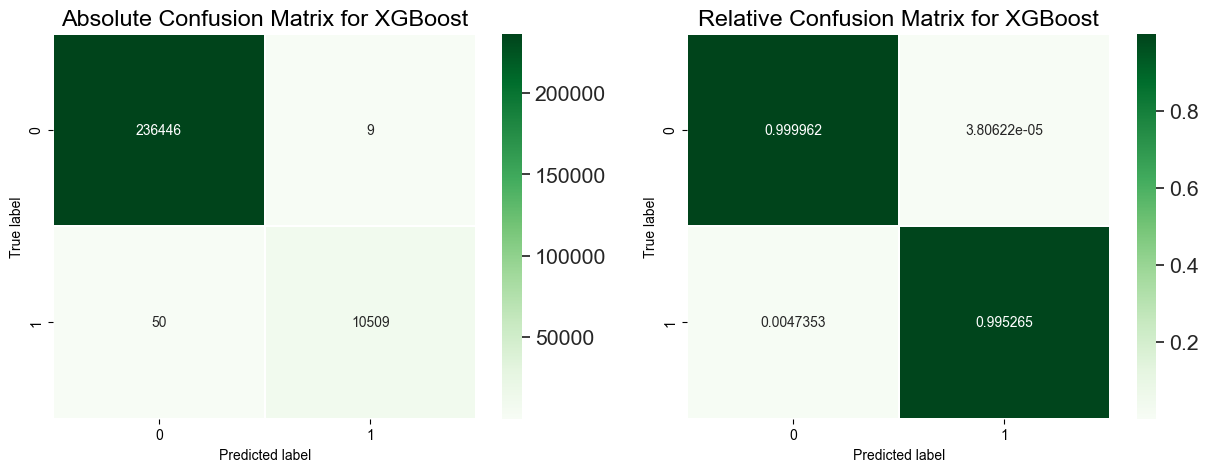

In [24]:
model = XGBoost_classification_tunned(best_hyperparams)

In [25]:
def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None, None, None, None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        model = XGBClassifier(
                n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
                gamma = best_hyperparams['gamma'],
                reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                colsample_bytree=int(best_hyperparams['colsample_bytree']),
                # subsample=int(best_hyperparams['subsample']),
                # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if best_results[0] < F1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (F1, "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1), matrix, percentage_matrix, model, X_train, y_train, X_test, y_test)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4], best_results[5], best_results[6], best_results[7], best_results[8]

9


99.79610223339182
99.98 & 99.93 & 99.66 & 99.80 \\


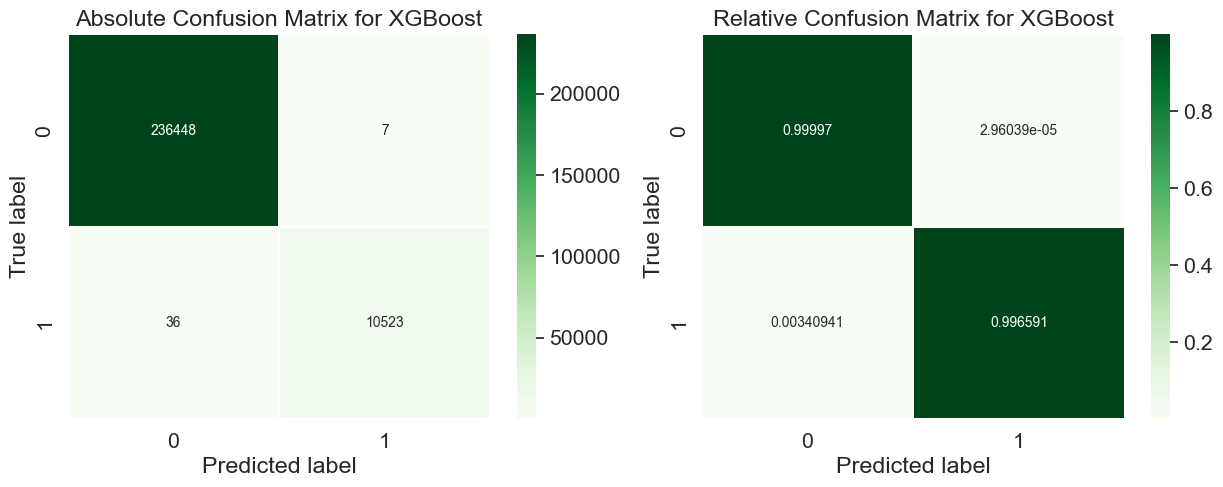

In [26]:
best_model, X_train, y_train, X_test, y_test = while_XGBoost_classification_tunned(best_hyperparams, cycles=10)

# Validation

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.98 & 99.93 & 99.68 & 99.80 \\
\hline



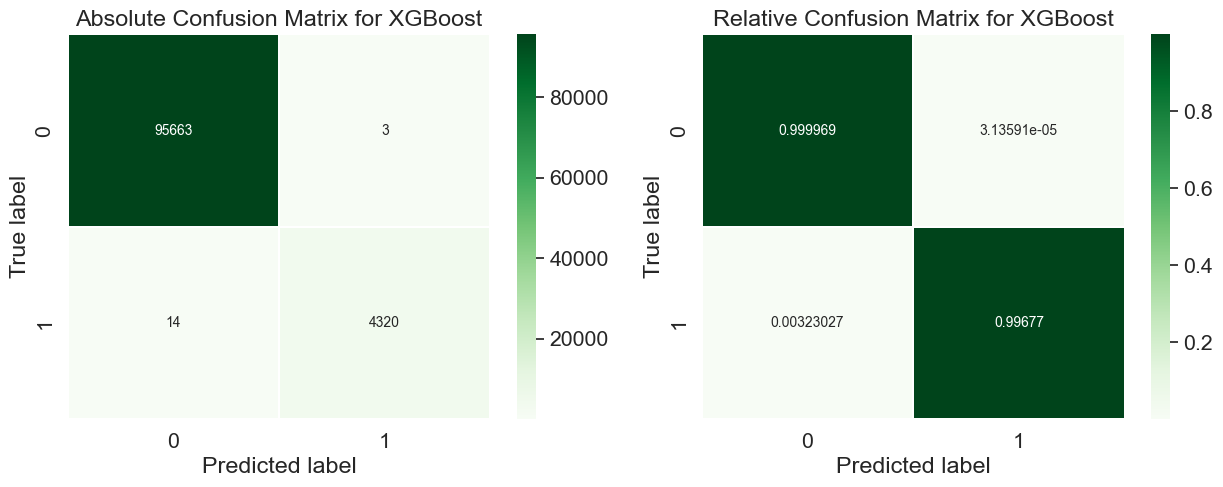

In [27]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels


y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

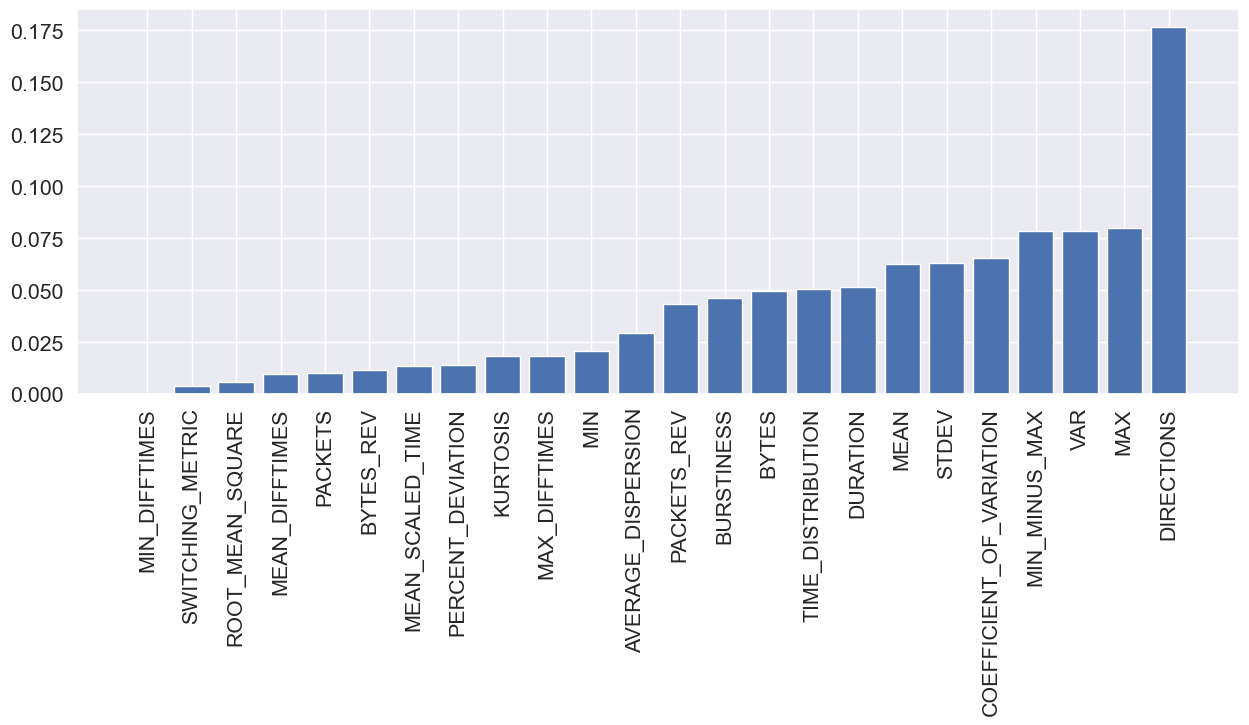

In [28]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [29]:
feat_importances.to_dict()

{'MIN_DIFFTIMES': 0.0,
 'SWITCHING_METRIC': 0.004065630491822958,
 'ROOT_MEAN_SQUARE': 0.005654171574860811,
 'MEAN_DIFFTIMES': 0.00950115267187357,
 'PACKETS': 0.009968831203877926,
 'BYTES_REV': 0.011416107416152954,
 'MEAN_SCALED_TIME': 0.01361233089119196,
 'PERCENT_DEVIATION': 0.013883206993341446,
 'KURTOSIS': 0.018076272681355476,
 'MAX_DIFFTIMES': 0.0181787870824337,
 'MIN': 0.020949523895978928,
 'AVERAGE_DISPERSION': 0.02914534881711006,
 'PACKETS_REV': 0.043244894593954086,
 'BURSTINESS': 0.046315502375364304,
 'BYTES': 0.049585405737161636,
 'TIME_DISTRIBUTION': 0.05078287422657013,
 'DURATION': 0.051311392337083817,
 'MEAN': 0.0627327635884285,
 'STDEV': 0.06289367377758026,
 'COEFFICIENT_OF_VARIATION': 0.06539683789014816,
 'MIN_MINUS_MAX': 0.07842609286308289,
 'VAR': 0.07854078710079193,
 'MAX': 0.07988223433494568,
 'DIRECTIONS': 0.176436185836792}